# Section 7 Matplotlib and Image Processing

## Matplotlib

[Matplotlib](https://matplotlib.org/) serves as the package to produce publication-quality figures in Python, and provides [interface closely resembling to matlab](https://matplotlib.org/tutorials/introductory/pyplot.html).

In [1]:
import matplotlib as mpl # import whole package
import matplotlib.pyplot as plt # or just import submodule pylot, providing matlab-like functions
# these are "standard shorthands", though some poeple use other nicknames

In [ ]:
dir(mpl)

In [ ]:
dir(plt)

Of course you can explore the [Github](https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib) to see the source codes if you like.

In [4]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

Basic usage of pyplot: Very similiar to Matlab

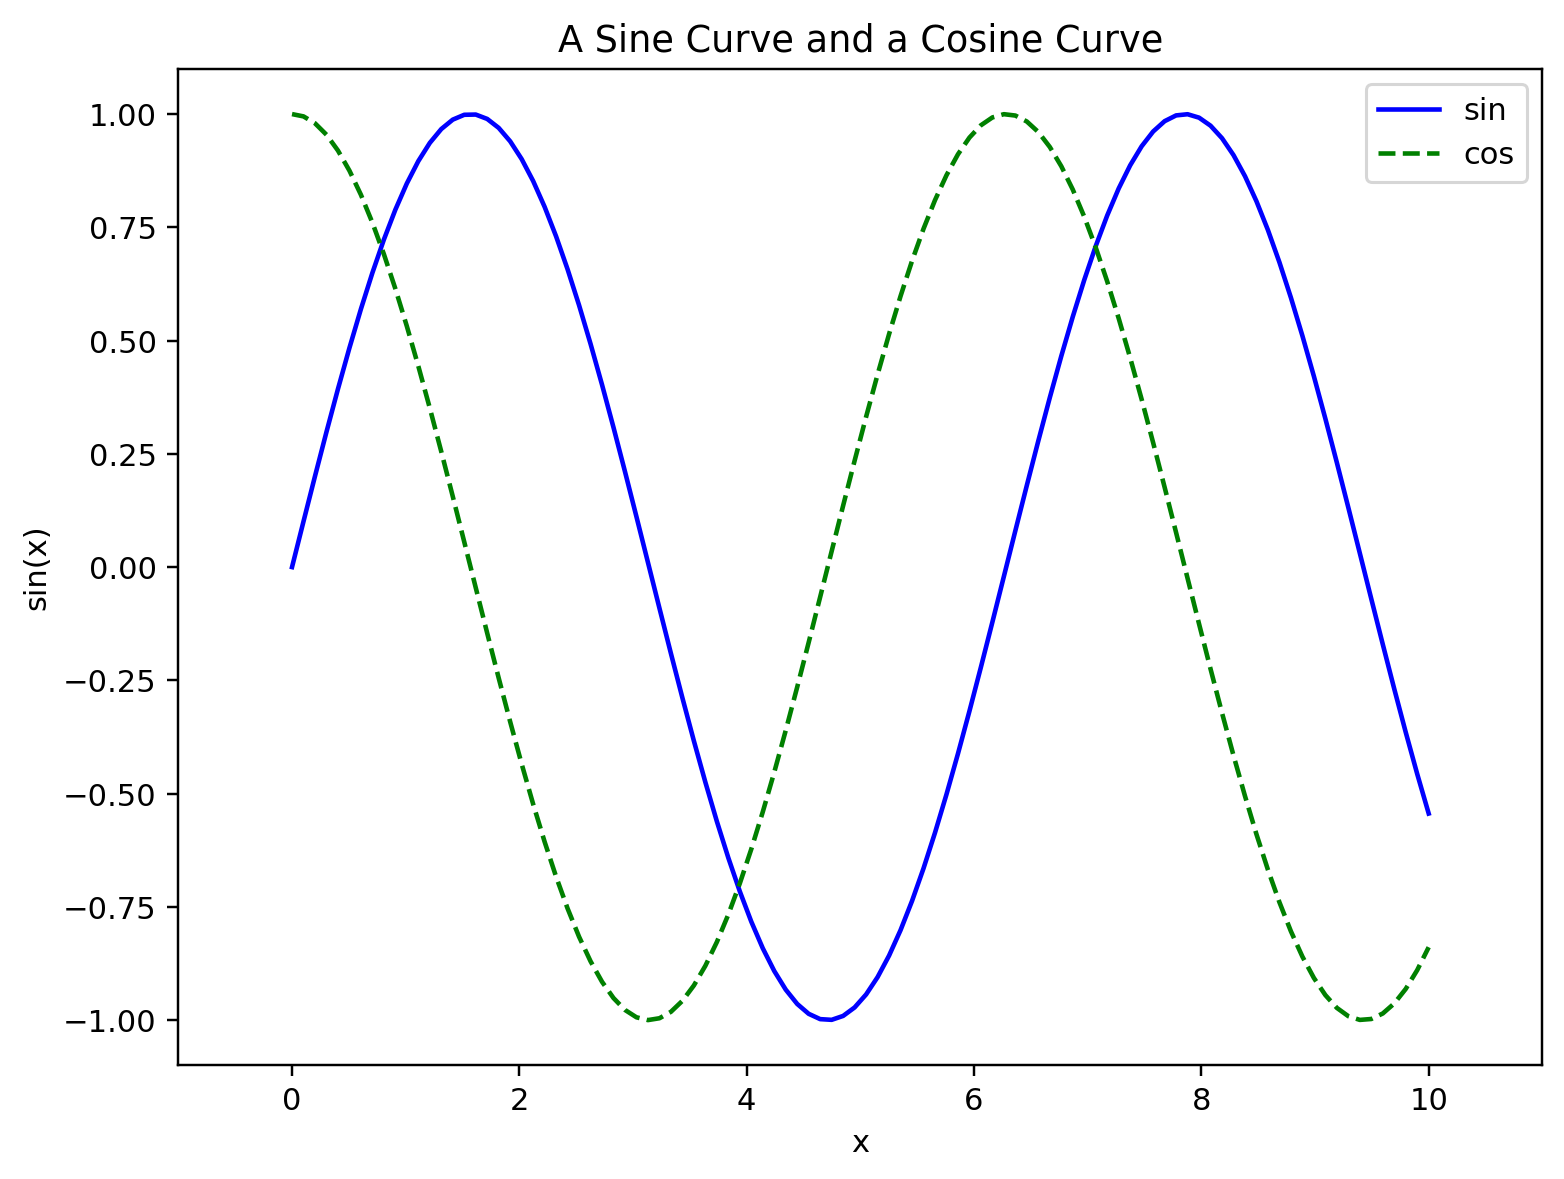

In [9]:
import numpy as np
x = np.linspace(0, 10, 100) #100 evenly spaced points from 0 to 10
fig = plt.figure(figsize=(8, 6),dpi=220) # create the figure, just like figure() in matlab
plt.plot(x, np.sin(x), linestyle = '-',color = 'b',label='sin')  # label is used for legend
plt.plot(x, np.cos(x), '--g', label = 'cos')
plt.xlim(-1, 11)
plt.title("A Sine Curve and a Cosine Curve") 
plt.xlabel('x') 
plt.ylabel("sin(x)")
plt.legend()

Of course there is some object-oriented feature.

In [10]:
type(fig)

matplotlib.figure.Figure

In [ ]:
dir(fig)

In [12]:
fig.savefig('myfigure.png') # savefig is just a method of instance fig!

The object-oriented feature is more evident in making subplots. [Explore more usages here](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html).

Text(0.5, 1.0, 'cos')

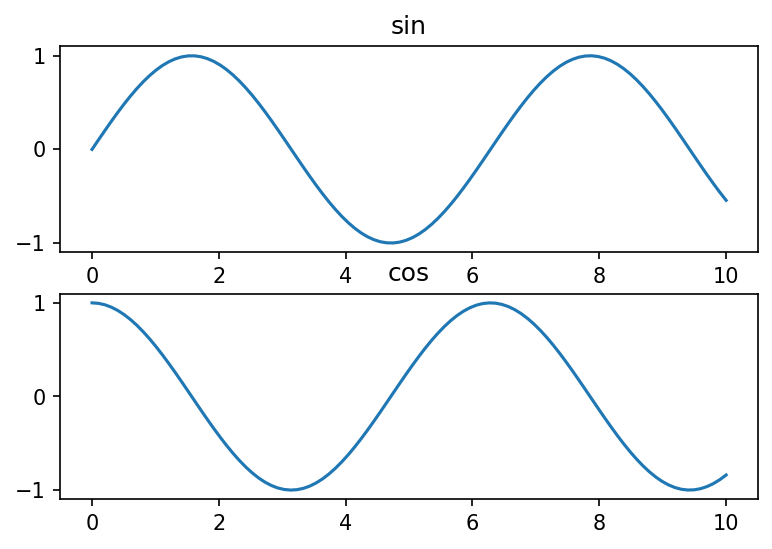

In [16]:
# subplots
fig, ax = plt.subplots(2, dpi =150) #dpi is dots per inch, measurement of image resolution. 2 gives number of plots
ax[0].plot(x, np.sin(x)) # plot and set_title are the methods of ax[0] -axes
ax[0].set_title('sin')
ax[1].plot(x, np.cos(x))
ax[1].set_title('cos')

[Distinguish the concept of axes and axis in Matplotlib](https://matplotlib.org/faq/usage_faq.html)

In [17]:
type(ax)

numpy.ndarray

In [11]:
type(ax[0])

matplotlib.axes._subplots.AxesSubplot

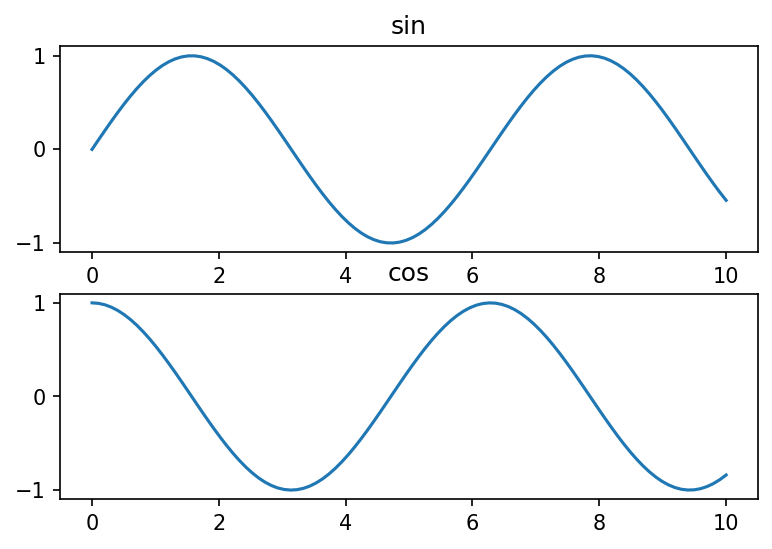

In [18]:
fig

## Image Processing

There are many great packages available to handle the image data in Python, such as [Pillow](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#using-the-image-class), [Scikit-Image](https://scikit-image.org/) and [opencv-python](https://github.com/skvark/opencv-python).

Here we import images from Scikit-Image which is [well-compatible with Numpy](https://scikit-image.org/docs/dev/user_guide/numpy_images.html), and use Numpy to manipulate images.

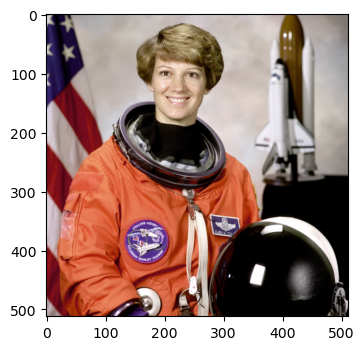

In [21]:
from skimage import data
image_astro = data.astronaut()# read the image as numpy array
image_rock = data.rocket()
fig = plt.figure(dpi=100)
plt.imshow(image_astro)

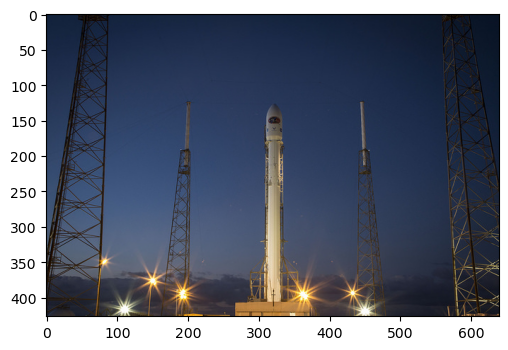

In [22]:
fig = plt.figure(dpi=100)
plt.imshow(image_rock)

In data science, a common way to store image is through 2D matrix (gray) or 3D tensor (RGB color).

For instance, a gray-scale image with size $m\times n$ can be represented by a matrix $I_{1}\in\mathbb{R}^{m\times n}$, whose elements denotes the intensities of pixels. 

A color image $m\times n$ can be represented by a tensor (or you can imagine three matrices stacked together) $I_{2}\in\mathbb{R}^{m\times n\times 3}$, where the three $m\times n$ matrices denote the intensity in red, green and blue channels respectively (basic assumption is any color can be decomposed in RGB)

In [23]:
image_astro.shape # 512-by-512 pixels, with RGB color channels

(512, 512, 3)

In [24]:
image_rock.shape  

(427, 640, 3)

In [25]:
image_rock[0,0,] # the RGB of first pixel

array([17, 33, 58], dtype=uint8)

In [26]:
[np.max(image_astro),np.min(image_astro)]

[255, 0]

Even with simple Numpy expressions, you can do some image processing like in Photoshop!

- Crop the images

In [27]:
image_astro_split = image_astro[:427,:,:]
image_rock_split = image_rock[:,:512,:]

In [29]:
image_rock_split.shape

(427, 512, 3)

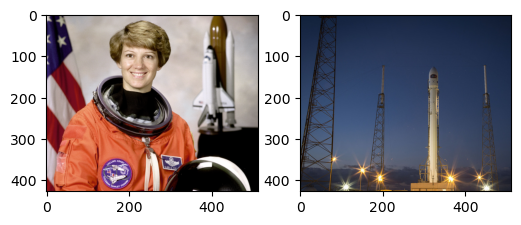

In [30]:
fig, ax = plt.subplots(ncols=2, dpi = 100)
ax[0].imshow(image_astro_split) # plot and set_title are the methods of ax[0] -axes
ax[1].imshow(image_rock_split)

- Invert the color intensities

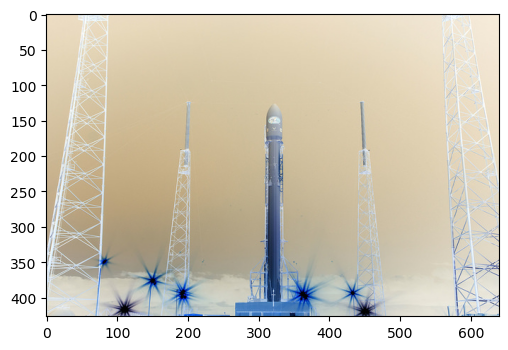

In [23]:
fig = plt.figure(dpi=100)
plt.imshow(255-image_rock)

- Exchange RGB channels

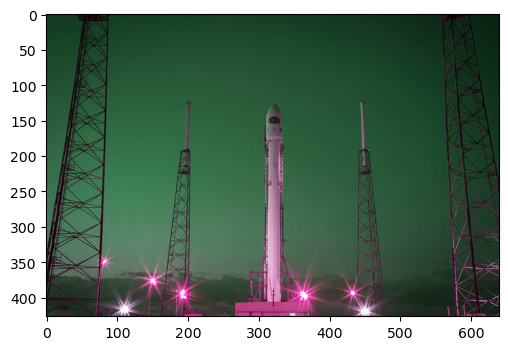

In [43]:
fig = plt.figure(dpi=100)
plt.imshow(image_rock[:,:,[0,2,1]])

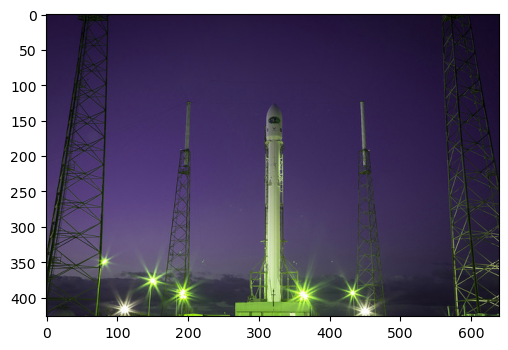

In [46]:
fig = plt.figure(dpi=100)
plt.imshow(image_rock[:,:,[1,0,2]])

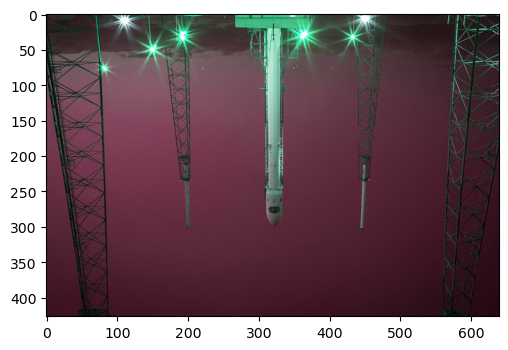

In [48]:
fig = plt.figure(dpi=100)
plt.imshow(image_rock[::-1,:,[2,0,1]])

- Binarize the image

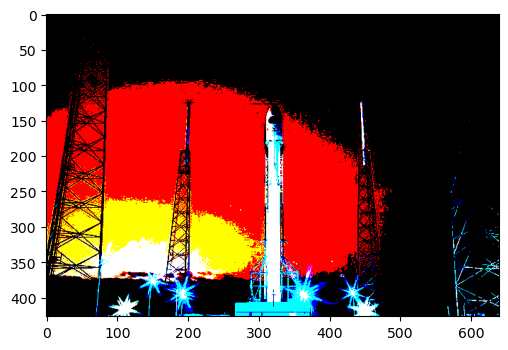

In [37]:
image = image_rock
image_bi = np.empty_like(image)

thresh = 90
maxval = 255

for i in range(3): #loop over each color channel
    image_bi[:, :, i] = (image[:, :, i] > thresh) * maxval

fig = plt.figure(dpi=100)
plt.imshow(image_bi[:,:,[2,1,0]])

In [31]:
image_bi

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

- Blending

(-0.5, 511.5, 426.5, -0.5)

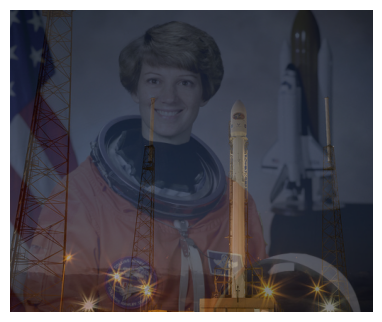

In [42]:
image_combine = 0.2*image_astro_split+0.5*image_rock_split
fig = plt.figure(dpi=100)
plt.imshow(image_combine.astype('uint8'))
plt.axis('off')